In [ ]:
# 출처: https://jimmy-ai.tistory.com/m/19

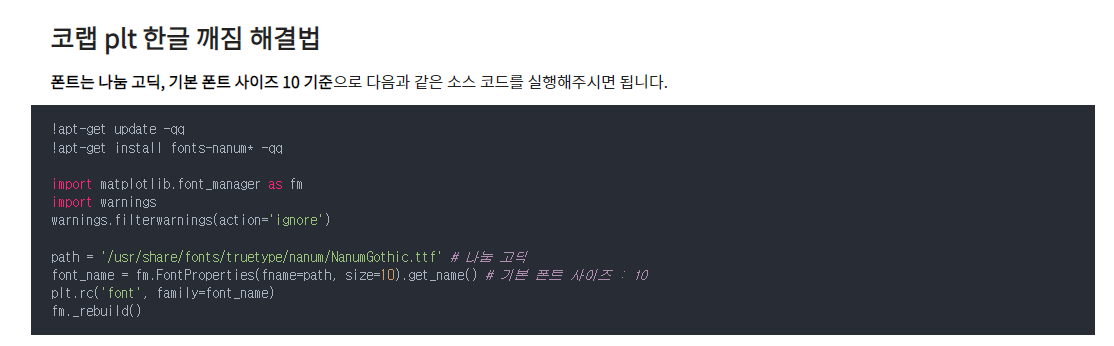

# 1. 제목 워드 클라우드

In [ ]:
##konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash


In [2]:
#경로 변경
%cd /content/drive/MyDrive/_프로젝트_교육생

/content/drive/MyDrive/_프로젝트_교육생


In [3]:
!pwd

/content/drive/MyDrive/_프로젝트_교육생


In [4]:
#코랩에서 plt 한글 깨짐 해결 아래 2개의 코드를 실행하고 런타임 다시직해야 함
!apt-get update -qq
!apt-get install fonts-nanum* -qq
# 위의 모듈 설치 후 메뉴[런타임-런타임 다시 시작]을 해야 함

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = 'NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [7]:
from konlpy.tag import Mecab
import pandas as pd
#워드 클라우드
from wordcloud import WordCloud

mecab = Mecab()

df=pd.read_csv('./최종_전세사기_all_.csv')
df['내용']=df['내용'].fillna('') # null을 빈값''으로 채움
text=' '.join(df['내용']) # 내용만 추출
nouns=mecab.nouns(text) # 내용에서 명사 추출
re1=' '.join(nouns)


In [8]:
re1

'개발 말 지역 갭 투자 재작년 말 원래 세대원 경기도 갭 투자 전 전입 신고 투자 지역 동의서 징구 중 제 서울 투자 곳 거주 기간 조합원 자격 건가요 부동산 경매 갭 투자 구조 수익금 둘 중 뭐 제 김포 쪽 신축 빌라 하나 제 지인 전세 전세 신축 빌라 집 갭 투자 가능 건가요 개인 회생 개시 나 월변 제금 납부 인가 결정 아버지 부동산업 부동산 갭 투자 전세 억 만 원 만 원 정도 제 명의 재산 억 변 제금 만 원 정도 추가 문제 갭 투자 건물 전입 세대 열람 위조 후 대출 공문서 위조 고소 전 합의 가능 고소장 접수 데 변호사 갭 투자 예 집 매매 값 억 억 전세 제 억 집 거 집 억 저 억 건가요 살 미혼 남성 매매 가액 억 천만 원 전세 억 천 백만 원 억 천 백만 원 갭 투자 해병대 부사관 년 올해 전역 취업 돈 천만 원 정도 제 빌라 매매 때 부모 보유 집 별개 건가요 부모 가구 포함 가구 주택 건가요 제 집 저 집 생활 도움 말씀 부탁 안녕 제 억 천 빌라 전세 계약 잔금 전 빌라 매매 억 천 안심 계약 소유주 시공사 시 행사 빌라 억 천 전세 억 갭 투자 급매 광고 전세 계약 상태 집 시 행사 갭 투자 수 건가요 불안 답변 제 울산 지역 매매 아파트 만 지불 방식 갭 투자 중개인 자본 부족 갭 투자 추천 세입자 기간 달 상태 계약금 정도 계약서 작성 때 세입자 기간 검색 최대 년 수 세입자 기간 년 조건 달 내 시 계약금 반환 특약 부동산 측 문의 경우 계약서 작성 저 가지 중 가지 경기 상황 고려 계약서 작성 계약서 작성 불응 땐 협의 게 부동산 측 상황 요세 뉴스 빌라 채 명 명의 만 원 연결 업체 부동산 연락처 갭 투자 나중 최대 년 집 갑 명의 변경 차액 프로 때 뉴스 거 이거 사기 거 건 빛 파산 건가요 파산 갭 투자 소개 수 너 집 주인 거주 갭 투자 시 진행 방식 억 매매 억 천 매도 전세 거주 요건 입니다 근저당 경우 말소 소유 이전 등기 다음 임대차 계약 작성 매도 근저당 말소 억 이 근저당 제 돈 전세 계약 때 반환 일반 집

In [9]:
# 내용에서 명사추출한 리스트 pickle로 저장하기(re1)
import pickle
with open('contents_nouns.pickle', 'wb') as f:
    pickle.dump(re1, f, pickle.HIGHEST_PROTOCOL)

# load
# with open('nouns.pickle', 'rb') as f:
#     data = pickle.load(f)

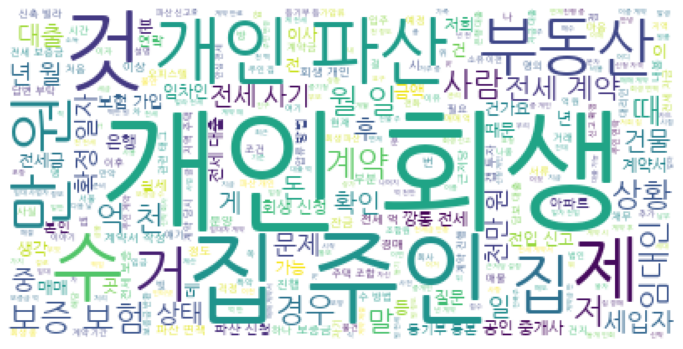

In [10]:
# stopwords 처리 전
wc = WordCloud('./NanumGothic.ttf',
               background_color = "white",
               max_words = 2000)
               #stopwords = stopwords)
wc = wc.generate(re1) # str자료만 가능, list자료는 안됨
plt.figure(figsize = (12, 12))
plt.imshow(wc) #interpolation = "bilinear")
plt.axis("off")
plt.savefig('./내용_워드클라우드_freq50/내용_워드클라우드_stoword전.png')
plt.show()

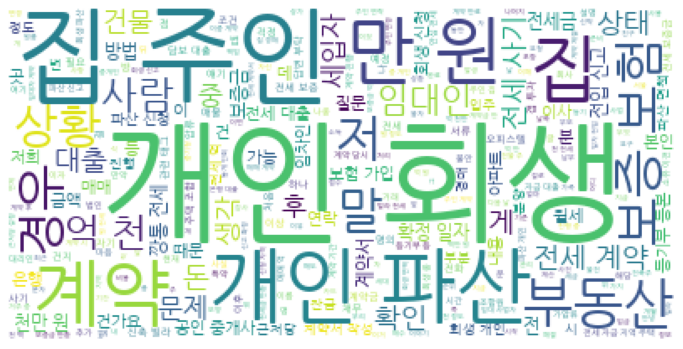

In [13]:
#stopwords 처리 후
stopwords=['거','것','수','때','제','년','월','일']

wc = WordCloud('./NanumGothic.ttf',
               background_color = "white",
               max_words = 2000,
               stopwords = stopwords)
wc = wc.generate(re1) # str자료만 가능, list자료는 안됨
plt.figure(figsize = (12, 12))
plt.imshow(wc) #interpolation = "bilinear")
plt.axis("off")
plt.savefig('./내용_워드클라우드_freq50/내용_워드클라우드_stoword후.png')
plt.show()

# 2. 단어 집계 (상위 노출 50단어 시각화)

In [14]:
from collections import Counter

In [15]:
#stopword
re2=re1.split(' ') 
stopword=['거','것','수','때','제','년','월','일']
re3=[i for i in re2 if i not in stopword]

In [16]:
top=50
cnt = Counter(re3)
top_=cnt.most_common(top)
top_

[('전세', 4427),
 ('개인', 4355),
 ('집', 4075),
 ('계약', 3665),
 ('회생', 3345),
 ('주인', 2492),
 ('파산', 2380),
 ('대출', 2297),
 ('억', 1868),
 ('원', 1799),
 ('부동산', 1563),
 ('만', 1190),
 ('사기', 1157),
 ('후', 1152),
 ('매매', 1125),
 ('중', 1113),
 ('천', 1106),
 ('계약서', 1079),
 ('보험', 1055),
 ('보증금', 1053),
 ('신청', 986),
 ('보증', 986),
 ('임대인', 955),
 ('가능', 954),
 ('저', 952),
 ('말', 914),
 ('경우', 902),
 ('확인', 863),
 ('신고', 839),
 ('상태', 811),
 ('건물', 807),
 ('상황', 805),
 ('진행', 787),
 ('돈', 774),
 ('사람', 771),
 ('전', 724),
 ('게', 701),
 ('등', 669),
 ('은행', 663),
 ('주택', 661),
 ('세입자', 658),
 ('연락', 658),
 ('전세금', 656),
 ('정도', 644),
 ('경매', 623),
 ('시', 616),
 ('계약금', 605),
 ('이사', 600),
 ('분', 599),
 ('문제', 594)]

In [17]:
df_top=pd.DataFrame(top_, columns=['word','freq']).set_index('word')
df_top.head()

,freq
word,
전세,4427
개인,4355
집,4075
계약,3665
회생,3345


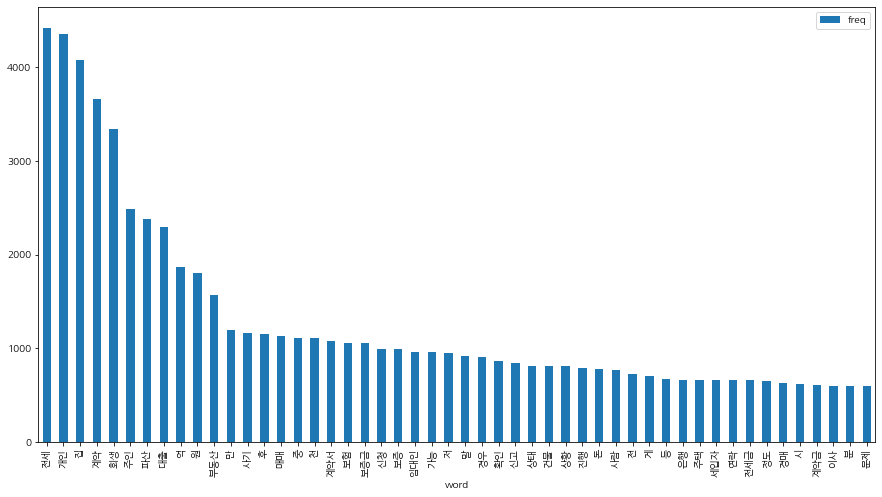

In [18]:
df_top.plot(kind='bar',figsize=(15,8))
plt.savefig('./내용_워드클라우드_freq50/내용freq50_bar_chart.png')
plt.show()